In [321]:
import os, sys

# Local modules
sys.path.append('./..')
import data_processing
import visualization
import stats

# Data management
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.patches import Patch


In [322]:
# Force reload modules  ## CAN BE REMOVED WHEN DONE
import importlib
importlib.reload(visualization)
importlib.reload(stats)
importlib.reload(data_processing)

<module 'data_processing' from '/scratch/jaap/SPVGazeAnalysis/exit_survey/./../data_processing.py'>

In [323]:
responses, question_mapping = data_processing.get_survey_responses()

#### Demographics (Q2 - Q6)

In [463]:
demographics = responses[['Q2', 'Q3']].rename(columns={'Q2':'Age','Q3':'Height'}).astype(float)
demographics.describe()

,Age,Height
count,18.000000,19.000000
mean,24.111111,171.368421
std,2.887883,14.345772
min,20.000000,140.000000
25%,23.000000,160.000000
50%,23.000000,171.000000
75%,24.000000,183.000000
max,34.000000,195.000000


Q4: What sex were you assigned at birth?
Q5: How often have you used a virtual reality headset before? (e.g. HTC Vive, Oculus Quest, Google Cardboard, Oculus Rift, ...)
Q6: Do you experience motion sickness regularly? (e.g. on the bus / train, while driving, in other VR environments)


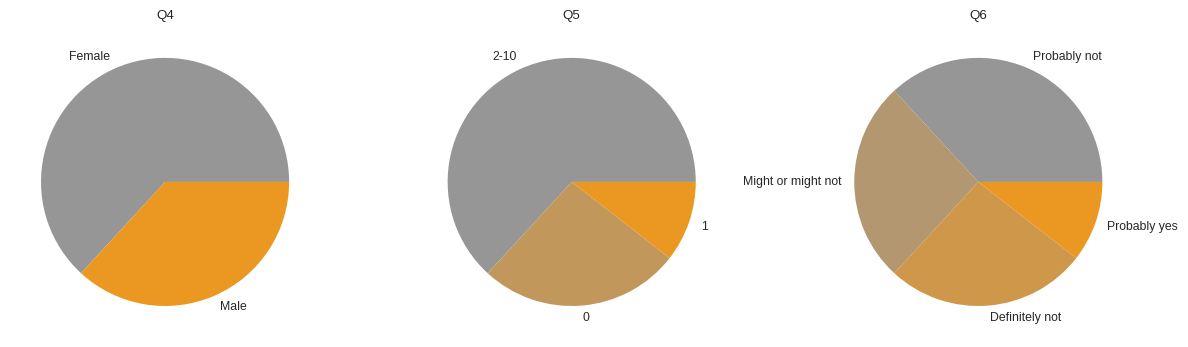

In [464]:
questions = ['Q4', 'Q5','Q6']

# Load color palette
visualization.set_figurestyle()
c = list(visualization.COLORS.values())


fig, axs = visualization.create_subplots(len(questions))
for i,q in enumerate(questions):# 'Q12', 'Q13', 'Q14', 'Q12']:
#     palette = sns.color_palette(f"blend:{c[1]},{c[2]},{c[0]}", n_colors=responses[q].nunique())
    palette = sns.color_palette(f"blend:{c[2]},{c[1]}", n_colors=responses[q].nunique())
    sns.set_palette(sns.color_palette(palette))
    
    h = responses[q].value_counts().T.plot(kind='pie', stacked=True, ax= axs[i])
    axs[i].set(title=q, ylabel='')
    print(f'{q}: {question_mapping[q]}')
plt.tight_layout()

### Practice / self-reported level of experience (Q7 - Q11) - Likert Scales

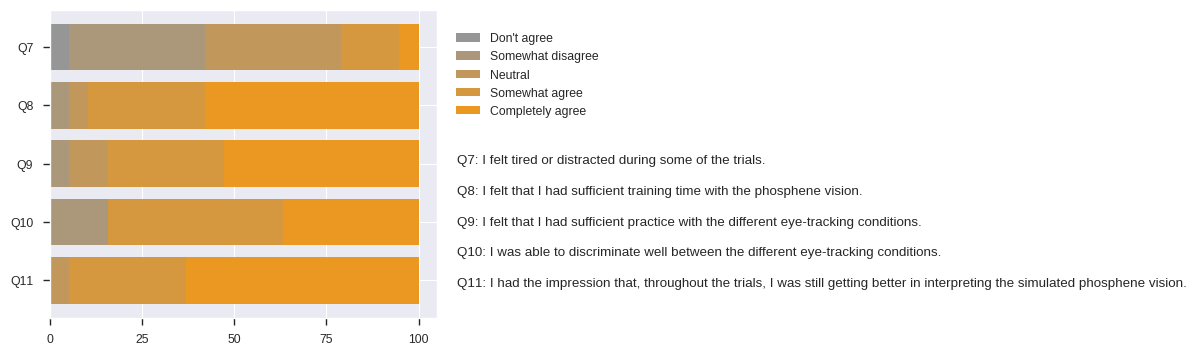

In [384]:
questions = ['Q7', 'Q8', 'Q9', 'Q10', 'Q11']
resp_cats = ["Don't agree", "Somewhat disagree", "Neutral", "Somewhat agree", "Completely agree"]
counts = pd.DataFrame({col: pd.value_counts(responses[col]) for col in questions}).fillna(0)
counts = 100 * counts / counts.sum()

# Load color palette
visualization.set_figurestyle()
c = list(visualization.COLORS.values())
# palette = sns.color_palette(f"blend:{c[1]},{c[2]},{c[0]}", n_colors=len(resp_cats))
palette = sns.color_palette(f"blend:{c[2]},{c[1]}", n_colors=len(resp_cats))

# Stacked horizontal barplot
fig,ax=visualization.create_subplots(1, figsize=(5,4))
bottom = pd.Series(np.zeros(5),index=questions)
for i,r in enumerate(resp_cats):
    values = counts.loc[r, questions]
    ax.barh(values.index[::-1],values[::-1], left=bottom[::-1], color=palette[i])
    bottom += values
ax.set_xticks([0,25,50,75,100])

# Add legend and add text
ax.legend(resp_cats, bbox_to_anchor=(1.02,.96))
rel_x, rel_y = (1.05, 0.5)
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
for q in questions:
    x = rel_x * (x_max-x_min) + x_min
    y = rel_y * (y_max-y_min) + y_min
    ax.text(x,y, f"{q}: {question_mapping[q]}")
    rel_y -=0.1

### Side effects  - Multiple options


Which of the below statements about nausea apply to you?
Q12_1: I experienced nausea in some of the trials in the ❌ condition. ->   0%
Q12_2: I experienced nausea in some of the trials in the 👁 condition. ->   5%
Q12_3: I experienced nausea in some of the trials in the 🔒 condition. ->  11%
Q12_4: I did not experience nausea. ->  68%
Q12_5: I did experience nausea but I don't remember in which specific condition. ->  16%
Q12_6: Eye movements increased my nausea. ->  11%
Q12_7: Other remarks (nausea) ->   5%

Which of the below statements about feeling disoriented apply to you?
Q13_1: I felt disoriented in some of the trials in the ❌ condition. ->   0%
Q13_2: I felt disoriented in some of the trials in the 👁 condition. ->  11%
Q13_3: I felt disoriented in some of the trials in the 🔒 condition. ->  37%
Q13_4: I did not feel disoriented. ->  32%
Q13_5: I did feel disoriented, but I don't remember in which specific condition. ->  21%
Q13_6: Eye movements increased my feeling of disorientat

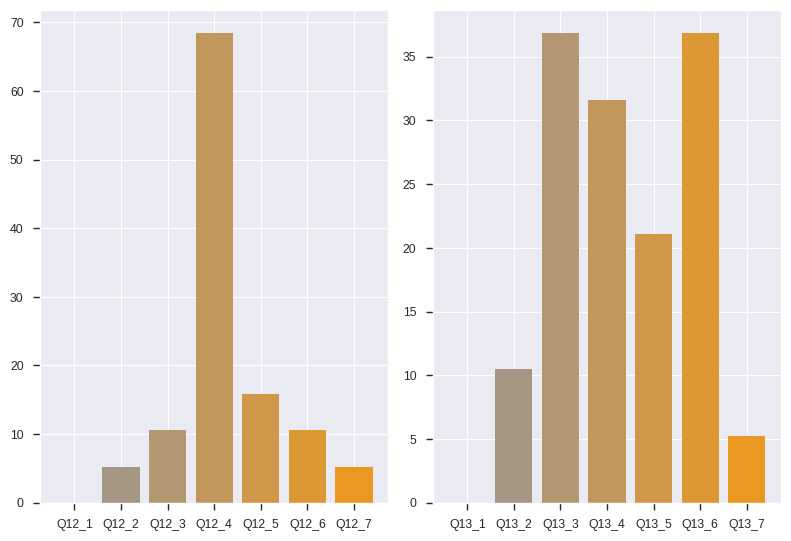

In [490]:
questions = ['Q12', 'Q13']

fig,axs = plt.subplots(1,len(questions))
for i,q in enumerate(questions):
    # Data
    options = [col for col in responses.columns if col.startswith(q) and col[-1].isnumeric()]
    counts = responses[options].count()
    counts = 100 * counts / 19
    
    # Colors 
    c = list(visualization.COLORS.values())
#     palette = sns.color_palette(f"blend:{c[1]},{c[2]},{c[0]}", n_colors=len(options))
    palette = sns.color_palette(f"blend:{c[2]},{c[1]}", n_colors=len(options))
    
    # Barplot
    axs[i].bar(counts.index, counts, color=palette)
    
    
    print('\n'+question_mapping[options[0]].split(' - Selected Choice - ')[0])
    for opt in options:
        question, answer = question_mapping[opt].split(' - Selected Choice - ')
        print(f'{opt}: {answer} -> {counts[opt]:3.0f}%')

plt.tight_layout()

### Strategies (Q15 - Q17) - multiple options


Which of the below statements about eye-movements apply to you?
Q15_1: In some of the trials, I purposely used more eye-movements (scanning). ->  58%
Q15_2: In some of the trials trials, I purposely tried to keep my eyes still (suppression). ->  68%
Q15_3: My strategy (scanning versus suppression) depended on the eye-tracking condition. ->  74%
Q15_4: My strategy depended on the task (visual search or scene recognition). ->  26%
Q15_6: My strategy depended on the environment. ->  11%
Q15_7: I did not voluntarily adjust my eye movements. ->   5%
Q15_8: Despite trying, I found it somewat difficult to suppress my eye-movements. ->  47%
Q15_5: Other remarks (eye-movements): ->  16%

In general, did you use any particular stategies to interpret the phosphene vision?
Q16_1: Exaggerated or frequent head movements ->  53%
Q16_2: Estimating depth by moving sideways ->  21%
Q16_3: Estimating boundaries with the centermost phosphenes ->  47%
Q16_4: Estimating boundaries with the outermost/periph

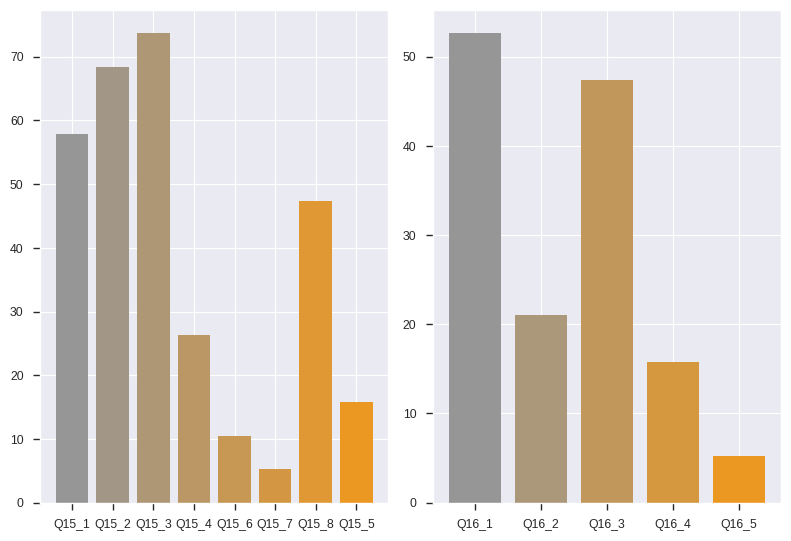

In [492]:
questions = ['Q15', 'Q16']

fig,axs = plt.subplots(1,len(questions))
for i,q in enumerate(questions):
    # Data
    options = [col for col in responses.columns if col.startswith(q) and col[-1].isnumeric()]
    counts = responses[options].count()
    counts = 100 * counts / 19
    
    # Colors 
    c = list(visualization.COLORS.values())
#     palette = sns.color_palette(f"blend:{c[1]},{c[2]},{c[0]}", n_colors=len(options))
    palette = sns.color_palette(f"blend:{c[2]},{c[1]}", n_colors=len(options))
    
    # Barplot
    axs[i].bar(counts.index, counts, color=palette)
    
    
    print('\n'+question_mapping[options[0]].split(' - Selected Choice - ')[0])
    for opt in options:
        question, answer = question_mapping[opt].split(' - Selected Choice - ')
        print(f'{opt}: {answer} -> {counts[opt]:3.0f}%')

plt.tight_layout()


For the scene recognition task, did you use any particular strategies?
Q17_1: Search for specific identifying objects ->  95%
Q17_2: Look for identifying textures, such as tiles on the walls, or stripes on the floor ->  11%
Q17_3: Estimating the size or structure of the room ->  26%
Q17_4: I used other strategies, namely.. ->   0%

For the visual search task, did you use any particular strategies?
Q18_1: Perform a systematic search at specific locations ->  84%
Q18_2: Search at memorized object locations ->  63%
Q18_3: Search at expected object locations, given the object category ->  95%
Q18_4: I used other strategies, namely.. ->   0%


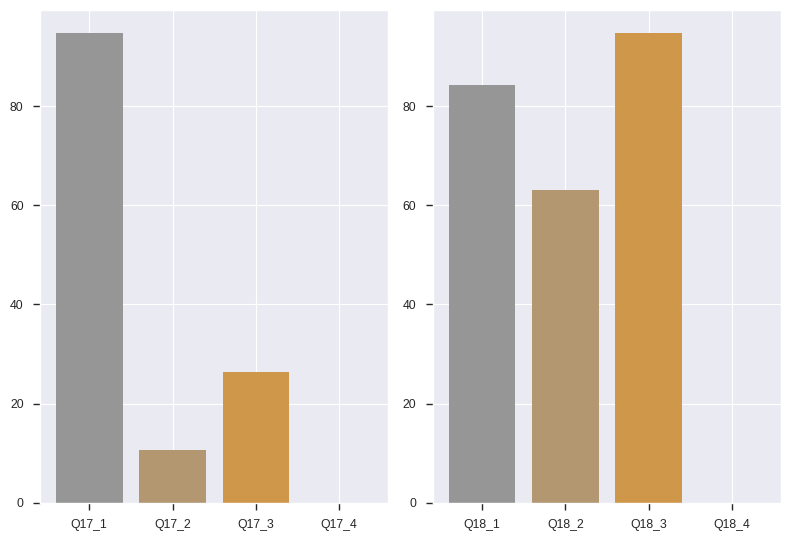

In [493]:
questions = ['Q17', 'Q18']

fig,axs = plt.subplots(1,len(questions))
for i,q in enumerate(questions):
    # Data
    options = [col for col in responses.columns if col.startswith(q) and col[-1].isnumeric()]
    counts = responses[options].count()
    counts = 100 * counts / 19
    
    # Colors 
    c = list(visualization.COLORS.values())
#     palette = sns.color_palette(f"blend:{c[1]},{c[2]},{c[0]}", n_colors=len(options))
    palette = sns.color_palette(f"blend:{c[2]},{c[1]}", n_colors=len(options))
    
    # Barplot
    axs[i].bar(counts.index, counts, color=palette)
    
    
    print('\n'+question_mapping[options[0]].split(' - Selected Choice - ')[0])
    for opt in options:
        question, answer = question_mapping[opt].split(' - Selected Choice - ')
        print(f'{opt}: {answer} -> {counts[opt]:3.0f}%')

plt.tight_layout()

### Freely written answers

In [448]:
import math 
questions = ['Q12_7_TEXT', 'Q13_7_TEXT', 'Q12_7_TEXT', 'Q14_1_TEXT',
             'Q15_5_TEXT', 'Q16_5_TEXT', 'Q17_4_TEXT', 'Q18_4_TEXT',
             'Q19_2_TEXT', 'Q20']

for q in questions:
    if responses[q].any():
        print(f'\n{q}: {question_mapping[q]}')
        for r in responses[q]:
            if type(r) == str:
                print(f'   > {r}')


Q12_7_TEXT: Which of the below statements about nausea apply to you? - Other remarks (nausea) - Text
   > Not in the cross condition

Q13_7_TEXT: Which of the below statements about feeling disoriented apply to you? - Other remarks (disorientation) - Text
   > Not in the cross condition

Q12_7_TEXT: Which of the below statements about nausea apply to you? - Other remarks (nausea) - Text
   > Not in the cross condition

Q14_1_TEXT: Did you experience any other side-effects? - I experienced other side effects, namely.. (if possible, try to be specific) - Text
   > I felt like I was looking through a net where light sometimes shone through. It felt like this became my new reality.
   > My eyes start feeling tired after a while because I was trying to focus my sight very hard
   > dizziness, last condition
   > Eyes got tired a bit after a while, but that's because I had my glasses off I suspect

Q15_5_TEXT: Which of the below statements about eye-movements apply to you? - Other remarks (